# Clustering Mall Customer Demographic Data

In [1]:
#Import basic packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
#Import dataset 
#file = '//Users//chung-tsengwang//Desktop//ALL DATA SCIENCE//Website Projects//Mall Demo//data//raw//Mall_Customers.csv'
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\Mall-Customer-Demographic-Segmentation-with-K-Means-Clustering\\data\\raw\\Mall_Customers.csv'
data = pd.read_csv(file)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
#Binarize Gender column
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(data.Genre)
lb.classes_
data.Genre = lb.transform(data.Genre)
data = data.rename(columns = {'Genre':'Gender','Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null int32
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int32(1), int64(4)
memory usage: 7.1 KB


In [89]:
data.describe()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [90]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

## Exploratory Data Analysis

C:\Users\Chung-Tseng Wang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



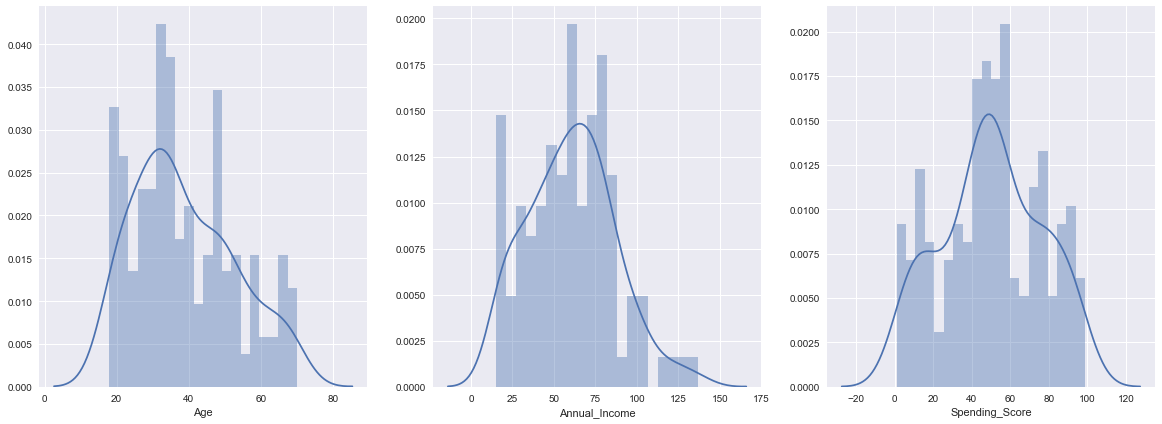

In [93]:
#Distribution charts
%matplotlib inline
sns.set(rc = {'figure.figsize':(20,7)})
plot_num = 1
for n in list(data[['Age','Annual_Income','Spending_Score']]):
    plt.subplot(1,3,plot_num)
    sns.distplot(data[n], bins = 20)
    plt.xlabel(n)
    plot_num += 1
sns.set_style('dark')
plt.show()

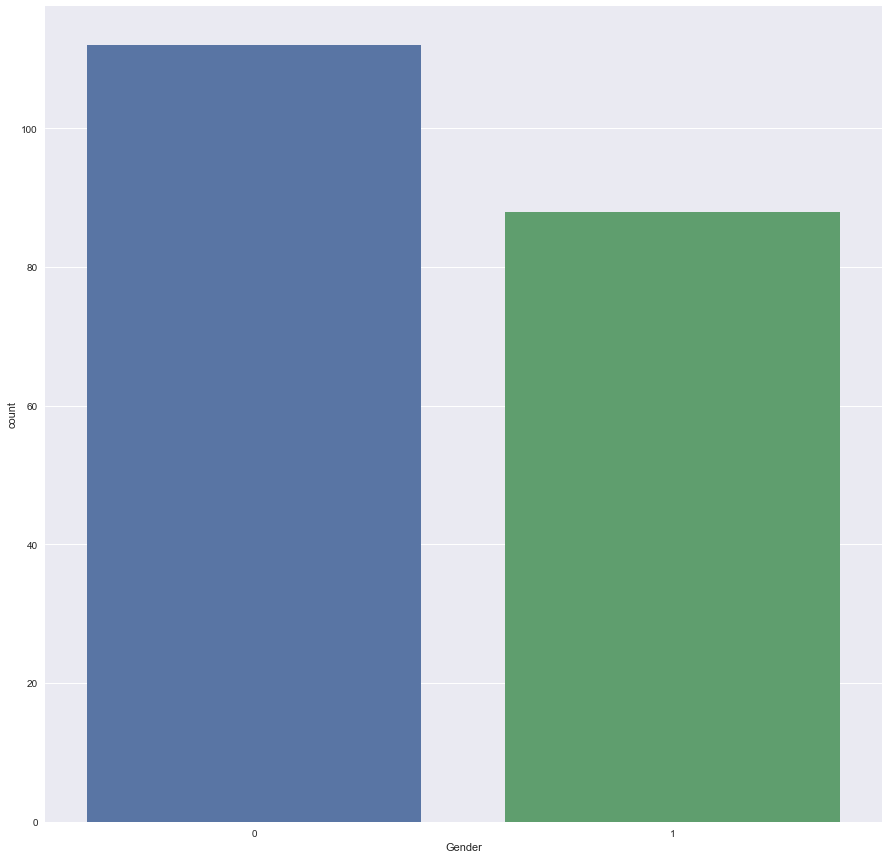

In [54]:
#Count plot for gender 
sns.set(style = 'darkgrid')
sns.countplot(x = data.Gender, data = data)

Text(0.5,0,'Gender')

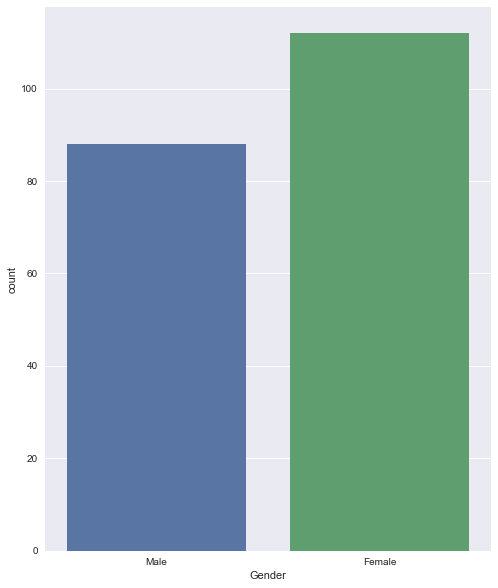

In [122]:
#Count plot for gender 
sns.set(style = 'darkgrid')
plt.figure(1, figsize = (8,10))
sns.countplot(x = data.Genre, data = data)
plt.xlabel('Gender')

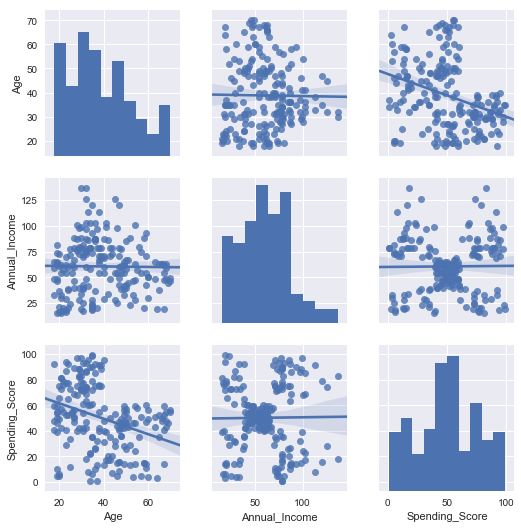

In [55]:
#Regression Pairplot
sns.pairplot(data[['Age','Annual_Income','Spending_Score']], kind = 'reg')

## Scaling Data

In [56]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import scale
import sklearn.metrics as sm 
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline 

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data[['Gender','Age','Annual_Income','Spending_Score']]))
X.columns = ['Gender', 'Age', 'Annual_Income',
       'Spending_Score']
X.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


## Building the model 

### Segmentation using Different Combinations 

In [58]:
income_spending = X[['Annual_Income','Spending_Score']]
age_spending = X[['Age','Spending_Score']]
age_income_spending = X[['Age','Spending_Score','Annual_Income']]

### Optimizing number of clusters 
Objective: Minimize Within Cluster Sum of Square (WCSS) with the Elbow method. <br>
As the number of cluster increases WCSS decreases.<br> When the number of clusters = number of instances WCSS = 0. <br>
When we graph number of clusters against WCSS we will see an elbow graph.<br>
On this elbow plot, the marginal decrease in WCSS decreases significantly at where the elbow bends.<br>
This point will be our optimal number of clusters. 

In [108]:
def WCSS(segment):
    WCSS = []
    for n in range(1, 20):
        clustering = (KMeans(n_clusters = n, n_init = 20, tol = 0.0001, random_state = 21, algorithm = 'auto'))
        clustering.fit(segment)
        WCSS.append(clustering.inertia_)
    plt.figure(1, figsize = (9,7))
    plt.plot(np.arange(1,20), WCSS, 'o')
    plt.plot(np.arange(1,20), WCSS, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Number of Clusters vs WCSS')
    plt.suptitle('Number of Clusters vs WCSS', color='w')
    plt.show()
    return WCSS

In [60]:
def clustering(segment, k):
    clustering = (KMeans(n_clusters = k, n_init = 20, tol = 0.0001, random_state = 21, algorithm = 'auto'))
    clustering.fit(segment)
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    WCSS = clustering.inertia_
    data = [[labels,centroids, WCSS]]
    output = pd.DataFrame(data, columns = ['labels','centroids','WCSS'])
    return output

In [61]:
def voroni_diagram(k):
    plt.figure(1, figsize = (15,7))
    plt.clf()
    

### Segmentation of Income and Spending Score 

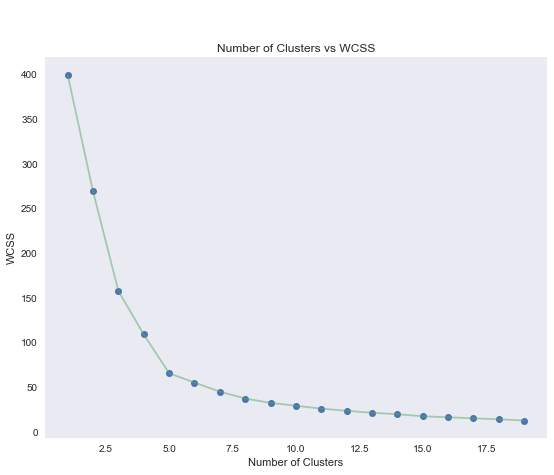

[400.0,
 269.1425070447922,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.18028799055898,
 32.345837779566594,
 29.115564557545756,
 25.87705460441242,
 23.450471424583707,
 21.228620713994047,
 19.644685327261914,
 17.29302384153823,
 16.209981771705298,
 15.027140884606286,
 13.933640619444937,
 12.587280954217556]

In [110]:
#Annual income and spending score
WCSS(income_spending)

In [63]:
clustering(income_spending, 5)

,labels,centroids,WCSS
0,"[3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, ...","[[-1.3295453164960271, 1.132177879659924], [1....",65.568408


### Segmentation of Age and Spending Score 

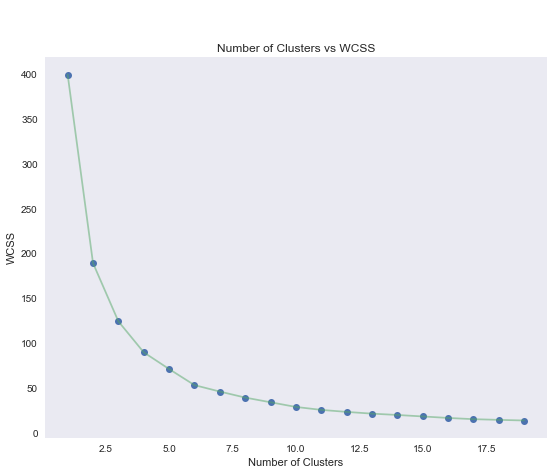

[399.99999999999994,
 189.3874903399243,
 124.32628617921529,
 89.76521676586151,
 71.09364141459412,
 53.128438356294,
 45.92039109051288,
 39.205654420244954,
 33.96106090559104,
 28.753588308545307,
 25.45873391068782,
 23.217032870050666,
 21.259251169843452,
 19.791643781641064,
 18.12338300021556,
 16.46131698921271,
 15.087537532519594,
 14.319220312242944,
 13.601735956062086]

In [111]:
#Age and spending score
WCSS(age_spending)

In [65]:
clustering(age_spending, 4)

,labels,centroids,WCSS
0,"[2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, ...","[[1.2292717770850257, -0.06558365788288453], [...",89.765217


### Segmentation of Age, Annual Income, and Spending Score

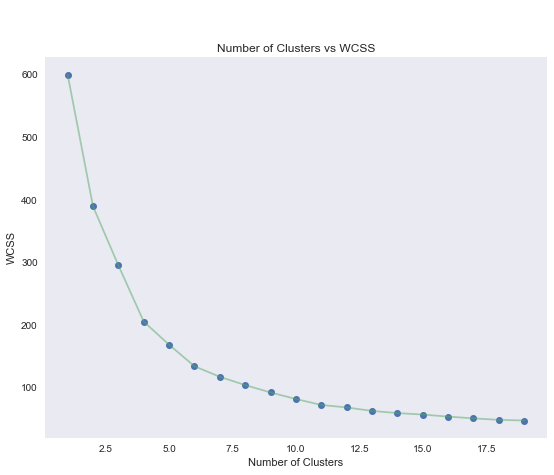

[600.0,
 389.3861889564372,
 295.2122461555488,
 205.22514747675916,
 168.24758017556837,
 133.86833362685584,
 117.01155455889813,
 103.82586112157725,
 91.9674441390967,
 81.54578352090964,
 72.03271246999174,
 68.07026749544032,
 62.50873076192292,
 59.05286485362851,
 56.67521433296268,
 53.42996723334559,
 50.608688958029084,
 48.212719858033076,
 47.18587577405682]

In [112]:
#Age and Annual Income
WCSS(age_income_spending)

In [67]:
clustering(age_income_spending, 5)['labels'][0]

array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

## Plotting Model Output

In [80]:
import plotly as py
import plotly.graph_objs as go
labels = clustering(age_income_spending, 5)['labels'][0]
trace = go.Scatter3d(
    x = X['Age'],
    y = X['Spending_Score'],
    z = X['Annual_Income'],
    mode = 'markers',
    marker = dict(color = labels, size = 20,
    line = dict(color = labels)),
    opacity = 0.8
)

data = [trace]
layout = go.Layout(
    title = 'Cluster',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()